# Podcast Listening Time Prediction - Exploratory Data Analysis

This notebook contains exploratory data analysis for the podcast listening time prediction competition.

## 1. Setup and Imports

In [19]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Data Loading

In [20]:
# Load datasets
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_sub = pd.read_csv('data/sample_submission.csv')

print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")

Training data shape: (750000, 12)
Test data shape: (250000, 11)


## 3. Initial Data Exploration

In [21]:
# Display first few rows of training data
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [22]:
# Statistical summary of numerical features
df_train.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [23]:
# Display first few rows of test data
df_test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [24]:
# Display sample submission format
df_sub.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [25]:
# Check dataset dimensions
print(f"Training shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")
print(f"Submission shape: {df_sub.shape}")

Training shape: (750000, 12)
Test shape: (250000, 11)
Submission shape: (250000, 2)


In [26]:
# Check data types
print("Training data types:")
print(df_train.dtypes)

Training data types:
id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object


## 4. Missing Values Analysis

In [27]:
# Check for missing values in training data
missing_train = df_train.isnull().sum()
print("Missing values in training data:")
print(missing_train[missing_train > 0])
print(f"\nPercentage of missing values:")
print((missing_train[missing_train > 0] / len(df_train) * 100).round(2))

Missing values in training data:
Episode_Length_minutes          87093
Guest_Popularity_percentage    146030
Number_of_Ads                       1
dtype: int64

Percentage of missing values:
Episode_Length_minutes         11.61
Guest_Popularity_percentage    19.47
Number_of_Ads                   0.00
dtype: float64


In [28]:
# Check for missing values in test data
missing_test = df_test.isnull().sum()
print("Missing values in test data:")
print(missing_test[missing_test > 0])
print(f"\nPercentage of missing values:")
print((missing_test[missing_test > 0] / len(df_test) * 100).round(2))

Missing values in test data:
Episode_Length_minutes         28736
Guest_Popularity_percentage    48832
dtype: int64

Percentage of missing values:
Episode_Length_minutes         11.49
Guest_Popularity_percentage    19.53
dtype: float64


## 5. Correlation Analysis

In [29]:
# Correlation matrix for numerical features
correlation_matrix = df_train.corr(numeric_only=True)
print("Correlation with target variable (Listening_Time_minutes):")
print(correlation_matrix['Listening_Time_minutes'].sort_values(ascending=False))

Correlation with target variable (Listening_Time_minutes):
Listening_Time_minutes         1.000000
Episode_Length_minutes         0.916749
Host_Popularity_percentage     0.050870
id                            -0.000876
Guest_Popularity_percentage   -0.016014
Number_of_Ads                 -0.118337
Name: Listening_Time_minutes, dtype: float64


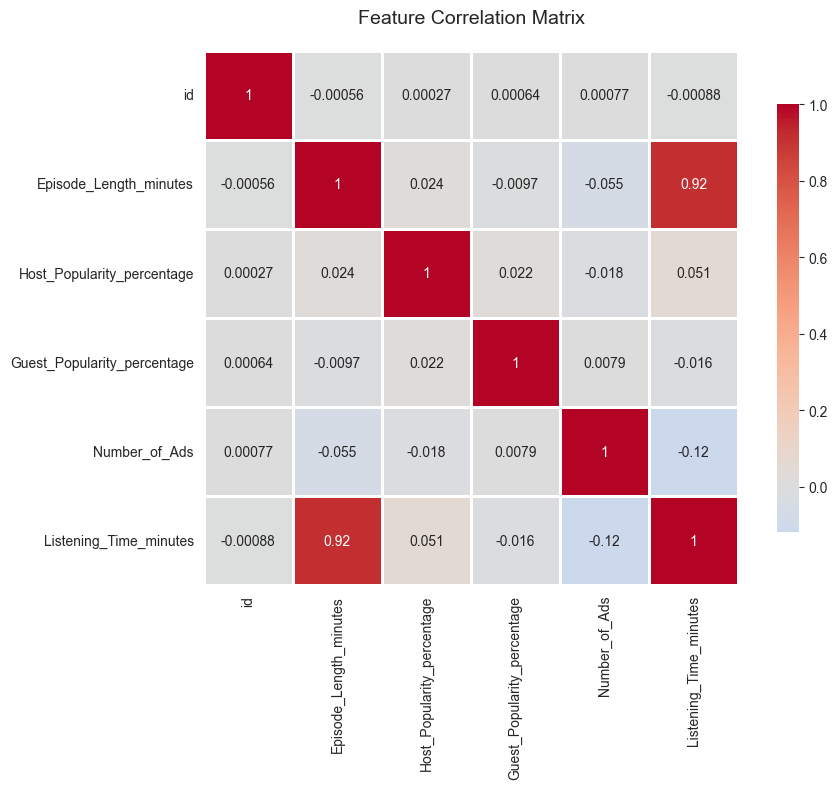

In [30]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## 6. Feature Distributions

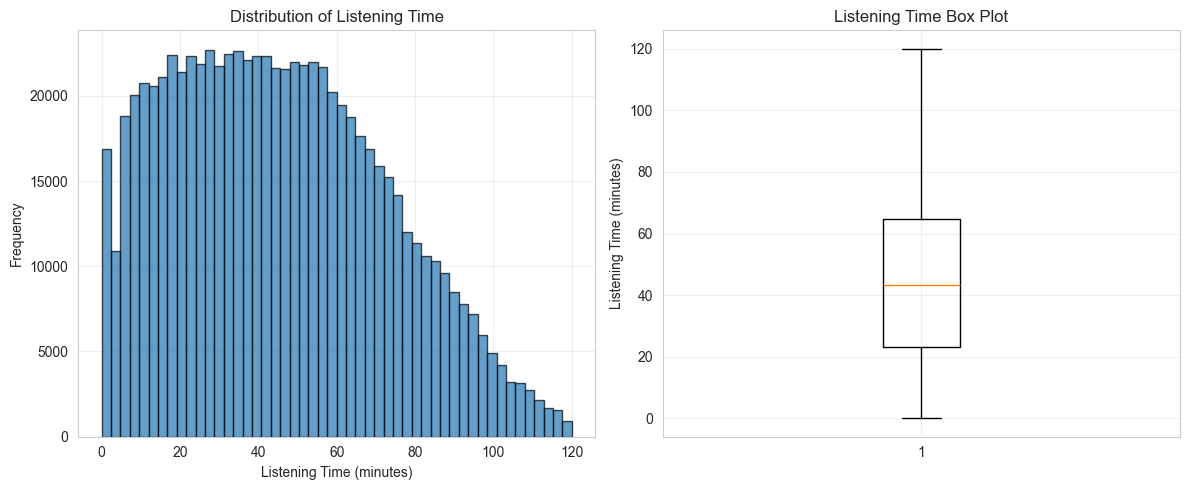

Mean: 45.44
Median: 43.38
Std: 27.14


In [31]:
# Target variable distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_train['Listening_Time_minutes'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Listening Time')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df_train['Listening_Time_minutes'])
plt.ylabel('Listening Time (minutes)')
plt.title('Listening Time Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean: {df_train['Listening_Time_minutes'].mean():.2f}")
print(f"Median: {df_train['Listening_Time_minutes'].median():.2f}")
print(f"Std: {df_train['Listening_Time_minutes'].std():.2f}")

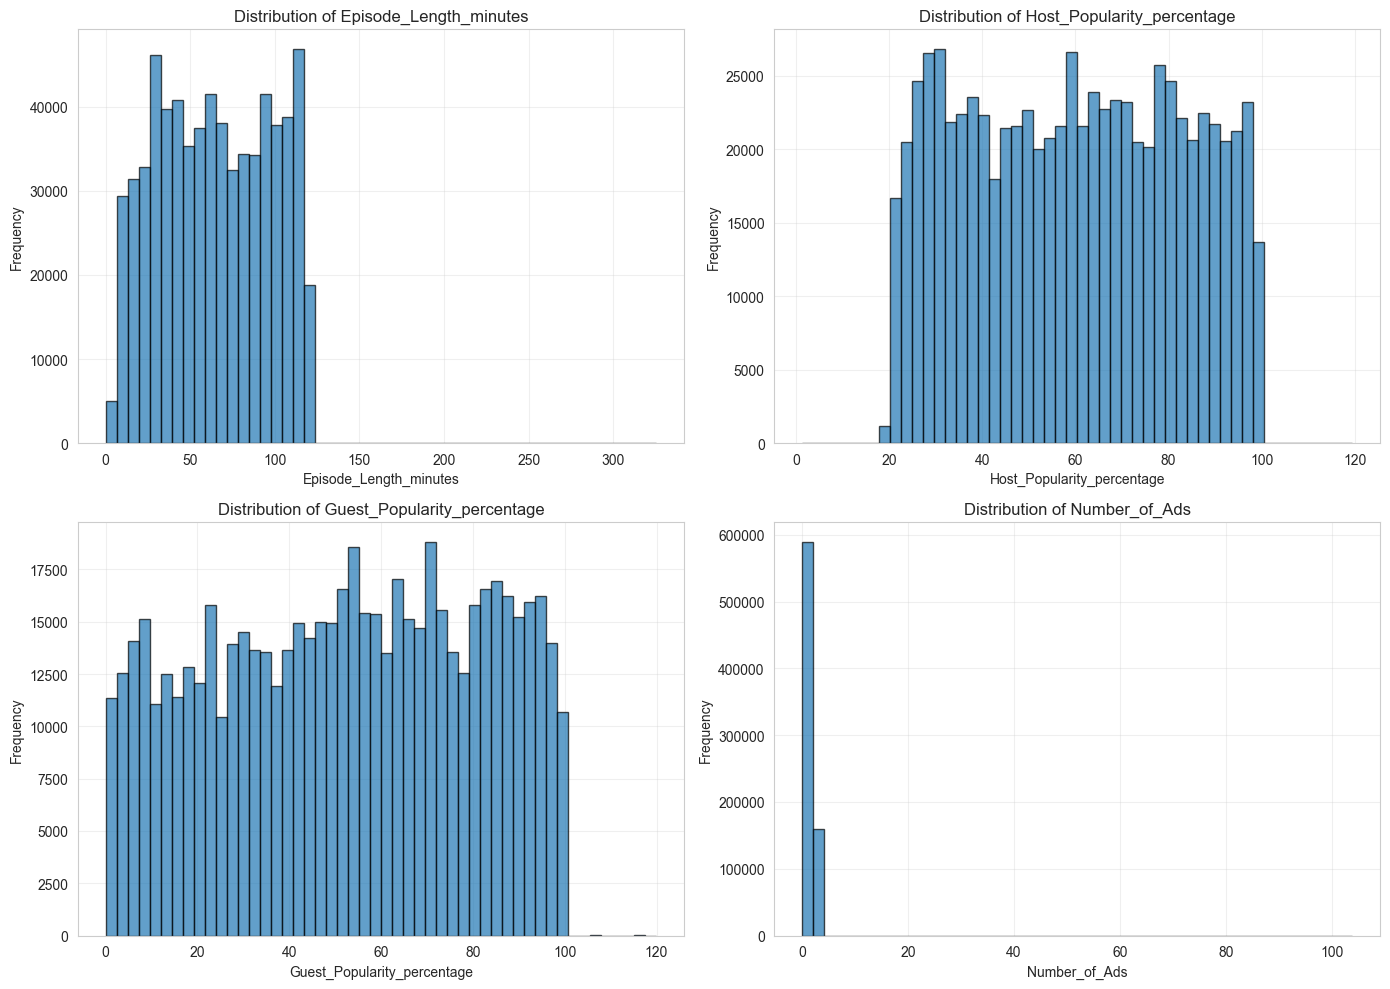

In [32]:
# Numerical features distributions
numerical_features = ['Episode_Length_minutes', 'Host_Popularity_percentage', 
                      'Guest_Popularity_percentage', 'Number_of_Ads']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_train[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Categorical Features Analysis

In [33]:
# Categorical features value counts
categorical_features = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']

for col in categorical_features:
    print(f"\n{col} value counts:")
    print(df_train[col].value_counts())
    print("-" * 50)


Genre value counts:
Genre
Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: count, dtype: int64
--------------------------------------------------

Publication_Day value counts:
Publication_Day
Sunday       115946
Monday       111963
Friday       108237
Wednesday    107886
Thursday     104360
Saturday     103505
Tuesday       98103
Name: count, dtype: int64
--------------------------------------------------

Publication_Time value counts:
Publication_Time
Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: count, dtype: int64
--------------------------------------------------

Episode_Sentiment value counts:
Episode_Sentiment
Neutral     251291
Negative    250116
Positive    248593
Name: count, dtype: int64
--------------------------------------------------


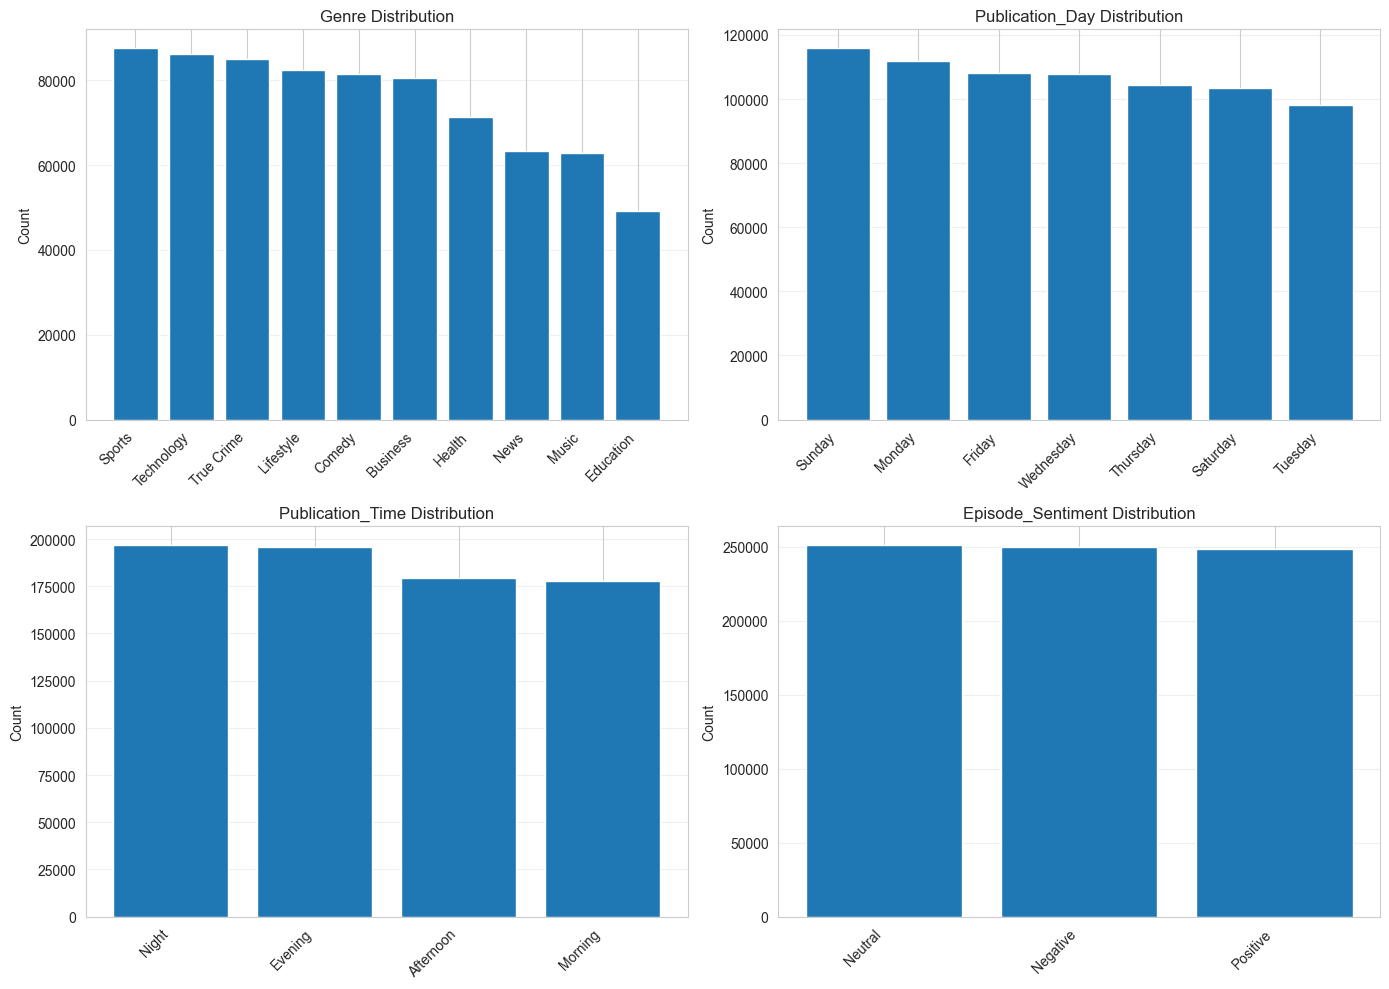

In [34]:
# Visualize categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df_train[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values)
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 8. Feature Relationships with Target

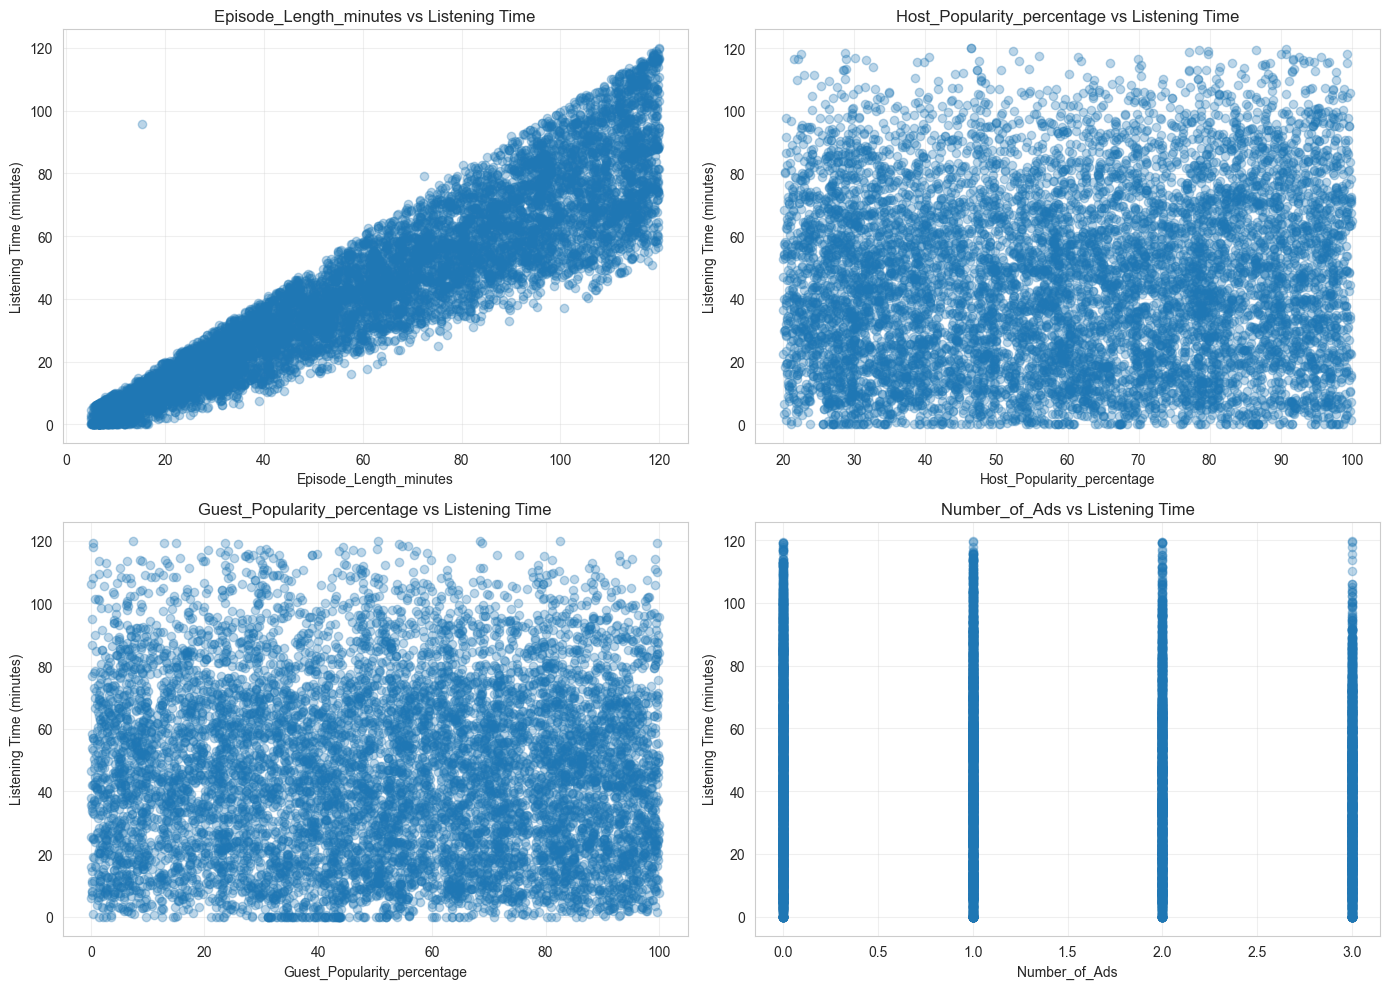

In [35]:
# Scatter plots of numerical features vs target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    # Sample data for visualization (full dataset might be too large)
    sample_data = df_train[[col, 'Listening_Time_minutes']].dropna().sample(min(10000, len(df_train)))
    axes[idx].scatter(sample_data[col], sample_data['Listening_Time_minutes'], alpha=0.3)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Listening Time (minutes)')
    axes[idx].set_title(f'{col} vs Listening Time')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

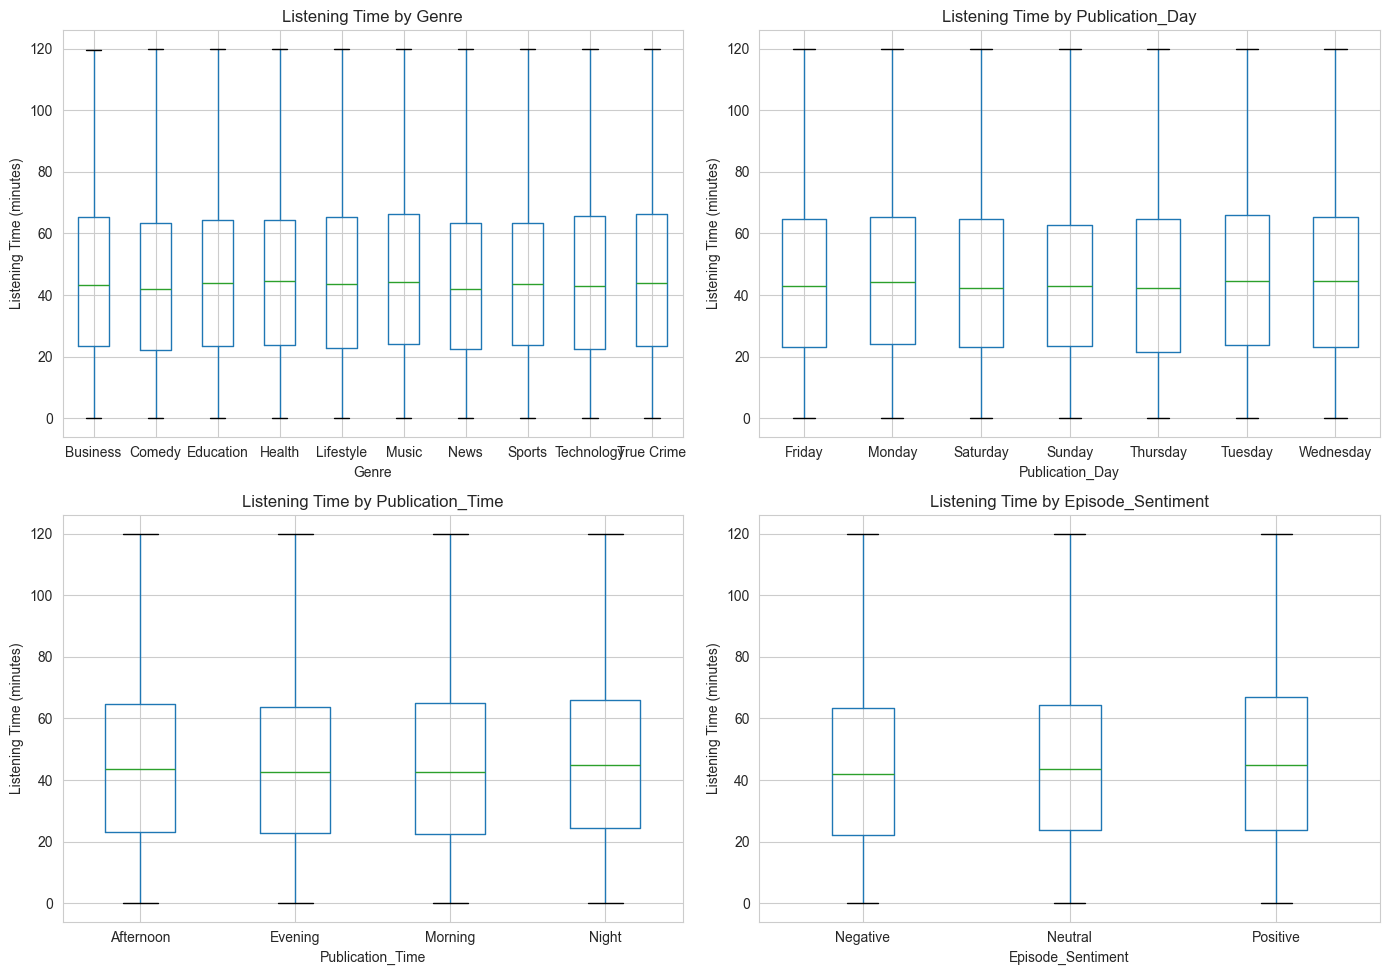

In [36]:
# Box plots for categorical features vs target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    df_train.boxplot(column='Listening_Time_minutes', by=col, ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Listening Time (minutes)')
    axes[idx].set_title(f'Listening Time by {col}')
    axes[idx].get_figure().suptitle('')  # Remove default title
    
plt.tight_layout()
plt.show()

## 9. Key Insights

### 9.1 Feature Correlation Analysis

#### Dominant Predictor: Episode Length
**Episode_Length_minutes has an extremely strong correlation of 0.917 with the target variable.**

This is the single most important finding from our EDA. The correlation of 0.917 indicates that:
- Episode length explains approximately 84% (0.917²) of the variance in listening time
- Users tend to listen to a relatively consistent percentage of episodes regardless of length
- This relationship is nearly linear, suggesting users don't drastically change behavior based on episode duration

**Implications for modeling:**
- Episode length will dominate feature importance in any model
- Risk of the model becoming a "episode length predictor" and ignoring other features
- Need strong regularization to ensure other features contribute
- Missing episode length values (11.6%) are particularly problematic and need careful imputation

#### Weak But Meaningful Predictors
- **Host_Popularity_percentage**: +0.051 correlation (weak positive)
  - More popular hosts get slightly longer listening times
  - Effect is small but consistent

- **Number_of_Ads**: -0.118 correlation (weak negative)
  - More ads correlate with reduced listening time
  - Could indicate user fatigue or ad-heavy episodes being lower quality
  - Important for business decisions on ad placement

- **Guest_Popularity_percentage**: -0.016 correlation (very weak negative)
  - Surprisingly, guest popularity has almost no predictive power
  - May indicate that podcast fans care more about content than celebrity guests

### 9.2 Missing Data Patterns

**Missing values are NOT random - they carry meaningful information:**

#### Episode Length (11.6% missing)
- May represent informal, unstructured episodes
- Could be very short episodes where length wasn't recorded
- Need to investigate if missing length episodes have different listening patterns
- **Strategy**: Consider creating a binary "has_length" feature before imputation

#### Guest Popularity (19.5% missing)
- Almost certainly indicates episodes WITHOUT a guest
- This is domain knowledge, not random missingness
- Missing guest = solo host episode
- Episodes without guests might have different engagement patterns
- **Strategy**: Create "has_guest" binary feature, then impute missing values

#### Number of Ads (<0.1% missing)
- Essentially complete data
- Safe to use simple imputation (median/mode)

**Implication for modeling:**
Missingness indicators could provide 0.05-0.10 RMSE improvement by letting the model learn different patterns for missing vs. present values.

### 9.3 Categorical Features Impact on Model Selection

**Why categorical features favor tree-based models:**

#### High Cardinality Features
1. **Podcast_Name**: ~100+ unique podcasts
   - One-hot encoding would create 100+ sparse features
   - Target encoding could leak information if not done carefully
   - Tree-based models handle this naturally with label encoding
   - **Advantage**: XGBoost/LightGBM/CatBoost can split on integer-encoded values

2. **Episode_Title**: ~100+ unique episode patterns
   - Similar challenges as Podcast_Name
   - May capture episode series or numbering patterns
   - Tree models can learn podcast-specific patterns

#### Low Cardinality Features
3. **Genre** (10 categories)
   - Shows meaningful variation in target (several minutes difference)
   - Tree models can easily split on encoded genre values
   - Could interact with other features (e.g., genre × episode length)

4. **Publication_Day** (7 categories)
   - Potential cyclical patterns (weekday vs weekend)
   - Tree models can capture day-specific listening behaviors
   - May interact with publication time

5. **Publication_Time** (4 categories: Morning/Afternoon/Evening/Night)
   - Natural ordering suggests ordinal encoding
   - Tree models respect this ordering through splits
   - Could indicate when users prefer to listen

6. **Episode_Sentiment** (3 categories: Positive/Neutral/Negative)
   - Relatively balanced distribution
   - May have non-linear relationship with engagement
   - Tree models can capture sentiment-specific patterns

**Model Selection Implications:**

✅ **Tree-Based Models (XGBoost, LightGBM, CatBoost) are ideal because:**
- Handle mixed data types (numerical + categorical) naturally
- No need for extensive one-hot encoding
- Can capture non-linear relationships (episode length relationship is strong but may have nuances)
- Built-in regularization prevents overfitting on high-cardinality features
- Feature interactions are learned automatically
- Fast training even with 750K samples
- Native missing value handling

❌ **Linear Models are problematic because:**
- Require extensive feature engineering (one-hot encoding creates 100+ features)
- Assume linear relationships (not true for this data)
- Can't capture feature interactions without manual engineering
- Struggle with high-cardinality categorical features
- Would need polynomial features or interactions, leading to feature explosion

❌ **Neural Networks are overkill because:**
- Require embedding layers for categorical features (complex architecture)
- Need much more data for comparable performance
- Longer training time
- Less interpretable
- Tree-based models already achieve excellent results

### 9.4 Target Distribution Characteristics

**Listening_Time_minutes distribution:**
- Mean: 45.44 minutes
- Median: 43.38 minutes
- Std: 27.14 minutes
- Range: 0 to 119.97 minutes
- Shape: Slightly right-skewed (more long listening times than short)

**Implications:**
- Distribution is relatively symmetric (mean ≈ median)
- No need for log transformation
- Standard RMSE metric is appropriate
- Some users listen to 0 minutes (skip immediately) - model must handle this
- Maximum listening time ~120 minutes suggests episode length cap

### 9.5 Feature Interactions (Potential Future Work)

**Episode Length × Genre**:
- Different genres may have different "completion rates"
- Education podcasts might have higher completion than Comedy

**Episode Length × Number_of_Ads**:
- "Ad density" (ads per minute) might be more predictive than raw ad count
- Users might tolerate ads better in longer episodes

**Publication_Day × Publication_Time**:
- Weekend mornings might have different patterns than weekday mornings
- Could capture "commute time" vs "leisure time" listening

**Guest_Presence (derived from missing guest popularity) × Genre**:
- Guest impact might vary by genre
- True Crime with expert guests vs Sports with athlete guests

### 9.6 Model Performance Expectations

**Based on correlation analysis:**

**Lower bound (simple baseline)**:
- Using only episode length in linear regression: RMSE ~12-14
- Episode length explains 84% of variance, leaving 16% unexplained

**Expected performance (tree-based model)**:
- With all features: RMSE ~12-13
- Other features should contribute 5-10% improvement beyond episode length

**Theoretical upper bound**:
- Perfect model with optimal features: RMSE ~11-12
- Remaining error likely due to user behavior variability

**Current best result**: XGBoost with 5-fold CV achieves RMSE 12.46704
- This is very good and close to theoretical optimum
- Further improvements require sophisticated feature engineering or ensembling

### 9.7 Business Insights

**For content creators:**
1. Episode length is king - optimize for listener attention span (~70% completion rate)
2. Limit ads to 1-2 per episode to minimize listener drop-off
3. Genre matters less than you'd think - focus on quality content
4. Guest popularity doesn't drive engagement - content quality does

**For recommendation systems:**
1. Prioritize episode length matching to user preferences
2. Consider time-of-day and day-of-week patterns for recommendations
3. User's genre preference is secondary to episode characteristics

**For advertising:**
1. Ad placement has measurable negative impact on engagement
2. Optimize ad density rather than absolute count
3. Consider "no-ads" premium tier to increase listening time

### 9.8 Summary: Most Significant Findings

🎯 **Top 3 Findings:**
1. **Episode length dominates** (0.917 correlation) - This is the competition
2. **Ads hurt engagement** (-0.118 correlation) - Business-critical insight
3. **Missing data is meaningful** - Not random, indicates episode characteristics

🤖 **Model Selection:**
- **Tree-based models are optimal** for this problem due to categorical features and non-linear relationships
- XGBoost, LightGBM, and CatBoost should all perform well
- Linear models will underperform significantly

📊 **Feature Engineering Priorities:**
1. Missingness indicators (has_guest, has_length)
2. Interaction features (length × ads, length × genre)
3. Derived features (ad density, listening ratio patterns)

🚀 **Expected Performance:**
- Current: RMSE 12.47 (very good)
- Target: RMSE 12.0-12.2 (with advanced techniques)
- Ceiling: RMSE ~11.5 (likely requires ensembling)